In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn.model_selection import train_test_split


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima

from arch import arch_model



In [3]:
##import machine learning models

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [4]:
daatasources={
    source.replace(".zip",""):source 
    for source in os.listdir("/Users/eduardomartinezacha/Desktop/coding/python/final material/project") 
    if source.endswith(".zip")}
daatasources


{'de-shareprices-daily': 'de-shareprices-daily.zip'}

In [5]:
datasets={}

for key, values in daatasources.items():
    datasets[key]= pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}",sep=';')

In [6]:
import pandas as pd

datasets = {}

for key, values in daatasources.items():
    datasets[key] = pd.read_csv(f"/Users/eduardomartinezacha/Desktop/coding/python/final material/project/{values}", sep=';')

# Combine all DataFrames into one
df = pd.concat(datasets.values(), ignore_index=True)

df['Price_Changes']= df['Open']- df['Close']
df['Price_Changes']

0        0.58
1        1.04
2       -0.43
3       -1.73
4       -1.92
         ... 
39091   -2.88
39092    2.82
39093    2.33
39094    0.00
39095   -0.27
Name: Price_Changes, Length: 39096, dtype: float64

In [7]:
df=pd.DataFrame(df)

In [8]:
vals=['VOW.DE','MBG.DE','BMW.DE','DRI.DE','DTE.DE']
df=df[df['Ticker'].isin(vals)]
df['Date']=pd.to_datetime(df['Date'])


In [9]:
automobile_vals=['VOW.DE','MBG.DE','BMW.DE']
auto=df[df['Ticker'].isin(automobile_vals)]
portfolio_auto= auto.groupby('Date').agg({'Close':'sum'})
portfolio_auto['log_returns']=np.log( portfolio_auto['Close']/portfolio_auto['Close'].shift(1))*100

telephone_vals=['DRI.DE','DTE.DE']
telephone= df[df['Ticker'].isin(telephone_vals)]
portfolio_tel= telephone.groupby('Date').agg({'Close':'sum'})
portfolio_tel['log_returns']=np.log( portfolio_tel['Close']/portfolio_tel['Close'].shift(1))*100



In [10]:
portfolio_auto= portfolio_auto[portfolio_auto['log_returns'].notnull()]
portfolio_tel= portfolio_tel[portfolio_tel['log_returns'].notnull()]


In [11]:
bmw=df[df['Ticker']=='BMW.DE']
dri=df[df['Ticker']=='DRI.DE']
dte=df[df['Ticker']=='DTE.DE']
mbg=df[df['Ticker']=='MBG.DE']
vow=df[df['Ticker']=='VOW.DE']


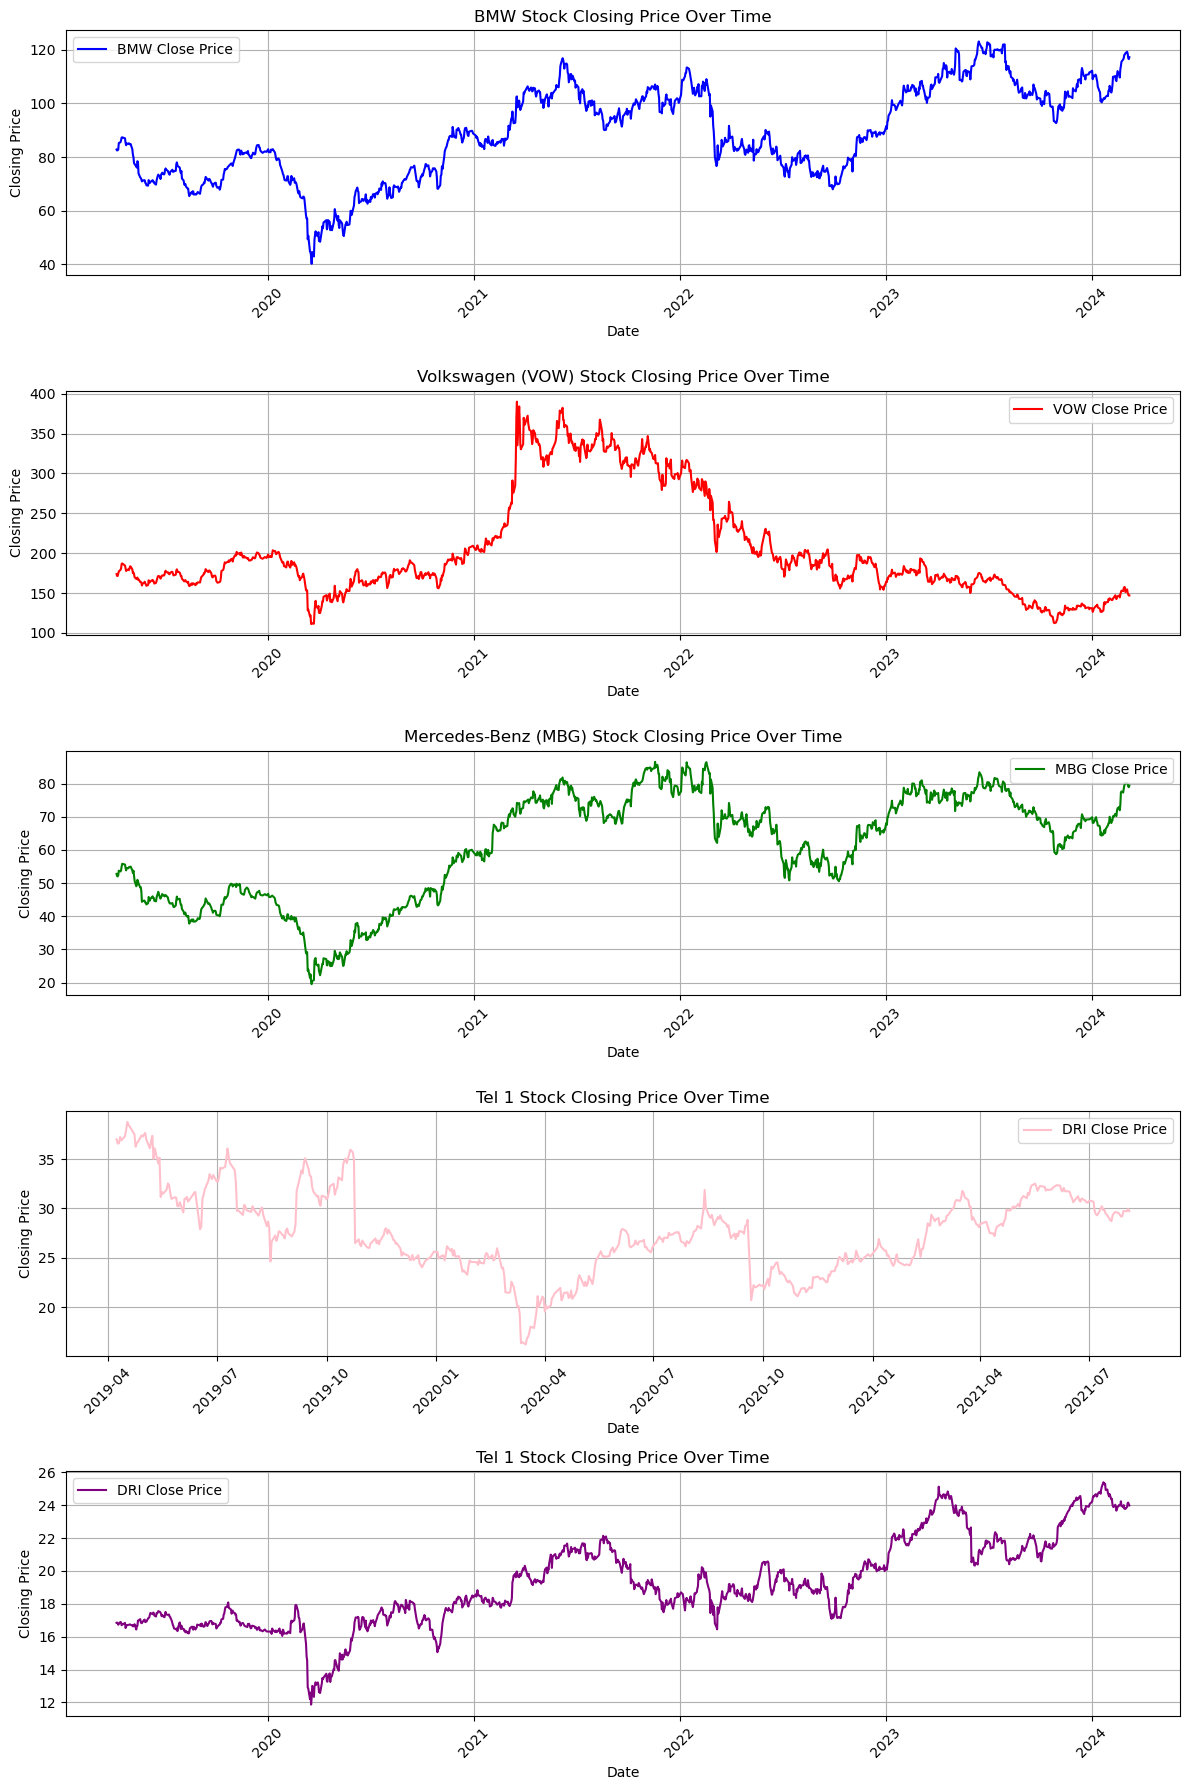

In [12]:
import matplotlib.pyplot as plt

# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 18))

# BMW Stock Closing Price
axes[0].plot(bmw['Date'], bmw['Close'], linestyle='-', label='BMW Close Price', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].set_title('BMW Stock Closing Price Over Time')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Volkswagen (VOW) Stock Closing Price
axes[1].plot(vow['Date'], vow['Close'], linestyle='-', label='VOW Close Price', color='red')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Volkswagen (VOW) Stock Closing Price Over Time')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Mercedes-Benz (MBG) Stock Closing Price
axes[2].plot(mbg['Date'], mbg['Close'], linestyle='-', label='MBG Close Price', color='green')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Closing Price')
axes[2].set_title('Mercedes-Benz (MBG) Stock Closing Price Over Time')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

axes[3].plot(dri['Date'], dri['Close'], linestyle='-', label='DRI Close Price', color='pink')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Closing Price')
axes[3].set_title('Tel 1 Stock Closing Price Over Time')
axes[3].legend()
axes[3].tick_params(axis='x', rotation=45)
axes[3].grid(True)

axes[4].plot(dte['Date'], dte['Close'], linestyle='-', label='DRI Close Price', color='purple')
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Closing Price')
axes[4].set_title('Tel 1 Stock Closing Price Over Time')
axes[4].legend()
axes[4].tick_params(axis='x', rotation=45)
axes[4].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### best arch model for the bmw stocks

/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF plot for Closing Price in log format')

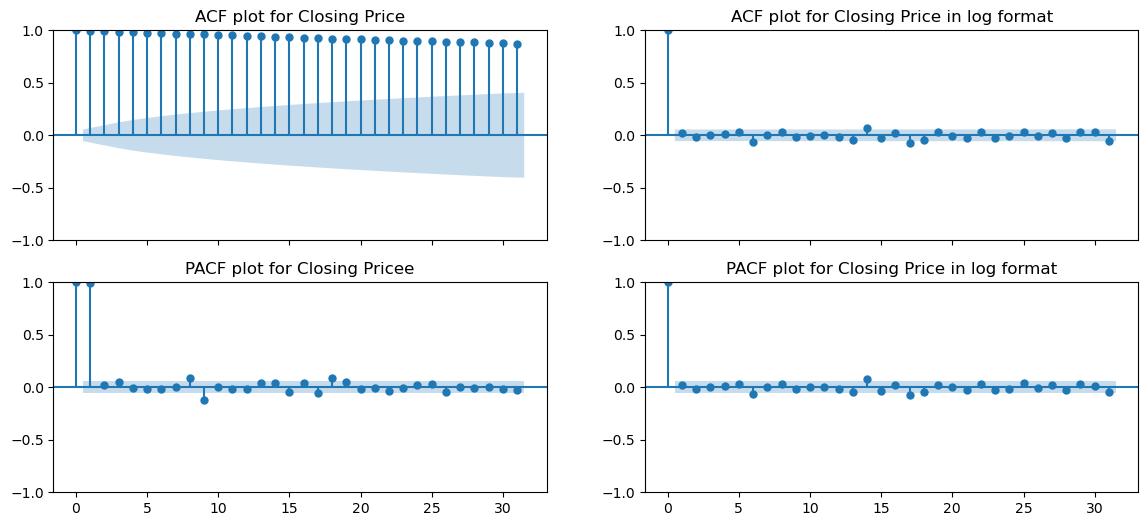

In [13]:
fig, axes=plt.subplots(2,2,figsize=(14,6),sharex=True)
plot_acf( portfolio_auto['Close'],ax=axes[0,0])
axes[0,0].set_title('ACF plot for Closing Price')
plot_pacf(portfolio_auto['Close'], ax=axes[1, 0])

axes[1,0].set_title('PACF plot for Closing Pricee')
plot_acf( portfolio_auto['log_returns'],ax=axes[0,1])
axes[0,1].set_title('ACF plot for Closing Price in log format')
plot_pacf(portfolio_auto['log_returns'], ax=axes[1, 1])

axes[1,1].set_title('PACF plot for Closing Price in log format')

In [64]:
auto_training= portfolio_auto[portfolio_auto.index<='2024-02-20']
auto_testing=portfolio_auto[portfolio_auto.index>='2024-02-20']
tel_training= portfolio_tel[portfolio_tel.index<='2024-02-20']
tel_testing=portfolio_tel[portfolio_tel.index>='2024-02-20']

auto_testing.index



,Close,log_returns
Date,,
2019-04-09,53.43,-0.801570
2019-04-10,53.43,0.000000
2019-04-11,53.96,0.987065
2019-04-12,53.68,-0.520254
2019-04-15,54.20,0.964042
...,...,...
2024-03-04,23.90,0.503357
2024-03-05,24.14,0.999176
2024-03-06,24.16,0.082816


In [15]:
auto_training.index

DatetimeIndex(['2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
               '2019-04-23', '2019-04-24',
               ...
               '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
               '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
               '2024-02-19', '2024-02-20'],
              dtype='datetime64[ns]', name='Date', length=1239, freq=None)

### get the best combination for all type of timeseries prediction models before computing each model for auto


/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


📈 Next predicted return: -0.01693149239006883
📉 Next predicted volatility (std dev): h.1    1.526543
Name: 2024-02-20 00:00:00, dtype: float64


/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


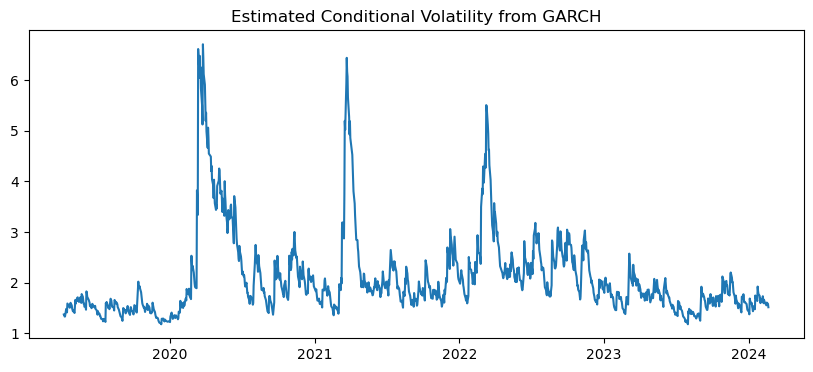

In [16]:
# Step 1: Prepare your log returns
y = auto_training['log_returns'].dropna()

# Step 2: Fit ARIMA model to mean
arima_model = ARIMA(y, order=(2, 0, 1))  # You can tune this later
arima_results = arima_model.fit()
residuals = arima_results.resid

# Step 3: Fit GARCH model to ARIMA residuals
garch_model = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_results = garch_model.fit(disp='off')

# Step 4: Forecast next period
arima_forecast = arima_results.forecast(steps=1)
garch_forecast = garch_results.forecast(horizon=1)

next_return = arima_forecast.iloc[0]
next_volatility = (garch_forecast.variance.iloc[-1]) ** 0.5

print("📈 Next predicted return:", next_return)
print("📉 Next predicted volatility (std dev):", next_volatility)

# Optional: Plot volatility
plt.figure(figsize=(10, 4))
plt.plot(garch_results.conditional_volatility)
plt.title("Estimated Conditional Volatility from GARCH")
plt.show()

In [17]:
# Step 1: Define your y
y = auto_training['log_returns'].dropna()

# Step 2: Fit ARIMA model
arima_model = ARIMA(y, order=(1, 0, 1))  # or whatever order you prefer
arima_results = arima_model.fit()
residuals = arima_results.resid

# Step 3: Fit GARCH on ARIMA residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(disp='off')

# Step 4: Forecasting multiple steps
forecast_horizon = len(pd.date_range(start="2024-02-20", end="2024-03-09", freq='B'))

# ARIMA forecast for mean (returns)
arima_forecast = arima_results.forecast(steps=forecast_horizon)

# GARCH forecast for variance
garch_forecast = garch_results.forecast(horizon=forecast_horizon)

# Extract values
mean_returns = arima_forecast.values
volatility_forecast = garch_forecast.variance.values[-1]**0.5  # Last row, all steps

# Build forecast DataFrame
forecast_df = pd.DataFrame({
    'date': pd.date_range(start="2024-02-20", end="2024-03-09", freq='B'),
    'expected_return': mean_returns,
    'volatility': volatility_forecast
})
forecast_df.set_index('date', inplace=True)
forecast_df


/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/eduardomartinezacha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Predicti

,expected_return,volatility
date,,
2024-02-20,-0.015455,1.529236
2024-02-21,0.017808,1.554577
2024-02-22,-0.005037,1.578869
2024-02-23,0.010653,1.602175
2024-02-26,-0.000123,1.624555
2024-02-27,0.007278,1.646062
2024-02-28,0.002195,1.666742
2024-02-29,0.005686,1.686642
2024-03-01,0.003288,1.705802


In [18]:
forecast_horizon

14

In [19]:
forecast_df

,expected_return,volatility
date,,
2024-02-20,-0.015455,1.529236
2024-02-21,0.017808,1.554577
2024-02-22,-0.005037,1.578869
2024-02-23,0.010653,1.602175
2024-02-26,-0.000123,1.624555
2024-02-27,0.007278,1.646062
2024-02-28,0.002195,1.666742
2024-02-29,0.005686,1.686642
2024-03-01,0.003288,1.705802


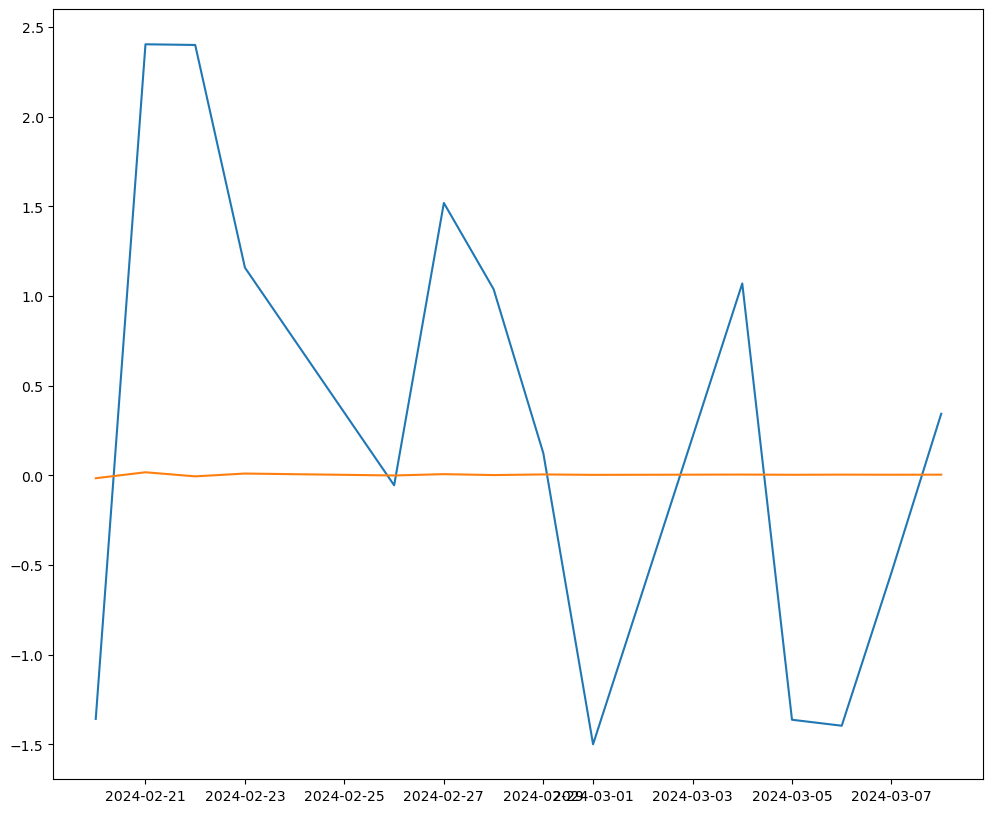

In [20]:
plt.figure(figsize=(12,10))
plt.plot(auto_testing.index,auto_testing['log_returns'],linestyle='-')
plt.plot(forecast_df.index,forecast_df['expected_return'])

In [24]:

auto_training.index = pd.to_datetime(auto_training.index)


In [25]:
auto_training

,Close,log_returns
Date,,
2019-04-09,306.09,-1.049716
2019-04-10,306.04,-0.016336
2019-04-11,309.17,1.017548
2019-04-12,316.10,2.216733
2019-04-15,318.19,0.659007
...,...,...
2024-02-14,320.99,-0.998148
2024-02-15,326.93,1.833611
2024-02-16,330.77,1.167719


### xgboost

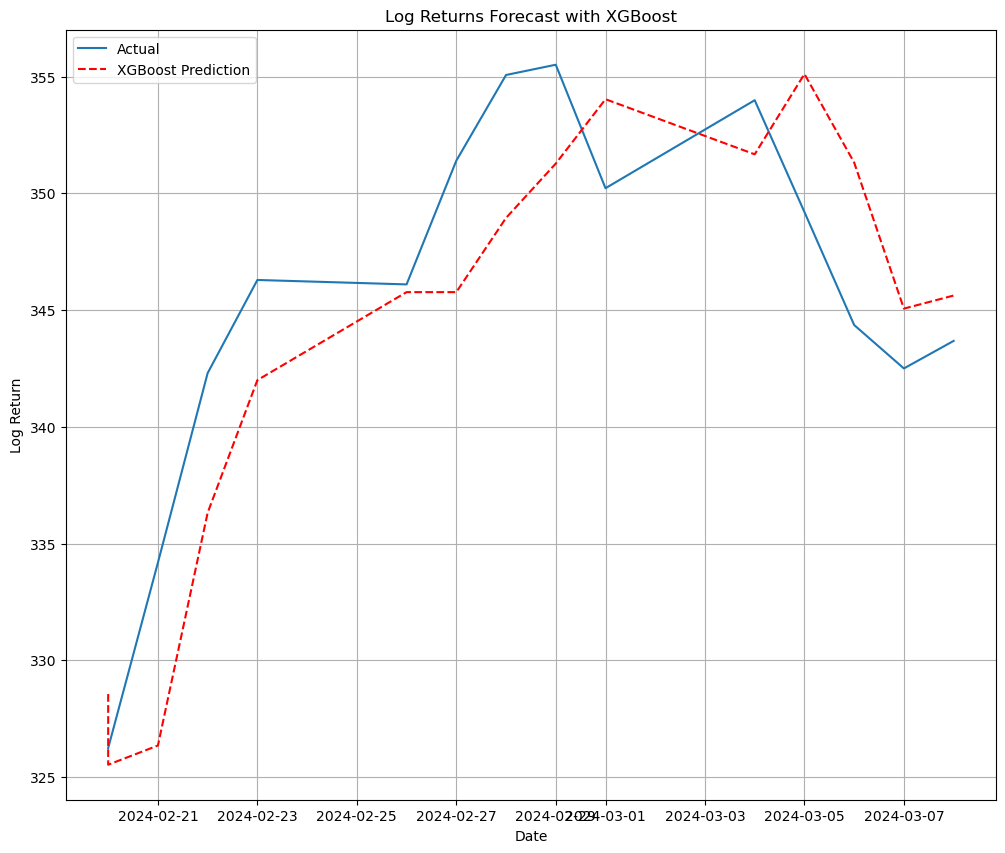

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Ensure datetime indexes
auto_training.index = pd.to_datetime(auto_training.index)
auto_testing.index = pd.to_datetime(auto_testing.index)

# Step 1: Combine both to create lag features across the boundary
combined = pd.concat([auto_training, auto_testing])

# Step 2: Create lag features (e.g., 5 lags)
for i in range(1, 6):
    combined[f'lag_{i}'] = combined['Close'].shift(i)

combined.dropna(inplace=True)

# Step 3: Split again using the original auto_training and auto_testing indexes
X = combined[[f'lag_{i}' for i in range(1, 6)]]
y = combined['Close']

# Match indices
X_train = X.loc[auto_training.index.intersection(X.index)]
y_train = y.loc[auto_training.index.intersection(y.index)]

X_test = X.loc[auto_testing.index.intersection(X.index)]
y_test = y.loc[auto_testing.index.intersection(y.index)]

# Step 4: Train the XGBoost model
model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 5: Predict
preds = model.predict(X_test)

# Step 6: Plot results
plt.figure(figsize=(12, 10))
plt.plot(y_test.index, y_test, label='Actual', linestyle='-')
plt.plot(y_test.index, preds, label='XGBoost Prediction', linestyle='--',color='red')
plt.title('Log Returns Forecast with XGBoost')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()



In [97]:
tel_training

,Close,log_returns
Date,,
2019-04-09,53.43,-0.801570
2019-04-10,53.43,0.000000
2019-04-11,53.96,0.987065
2019-04-12,53.68,-0.520254
2019-04-15,54.20,0.964042
...,...,...
2024-02-14,23.67,-1.134228
2024-02-15,23.77,0.421586
2024-02-16,23.88,0.461701


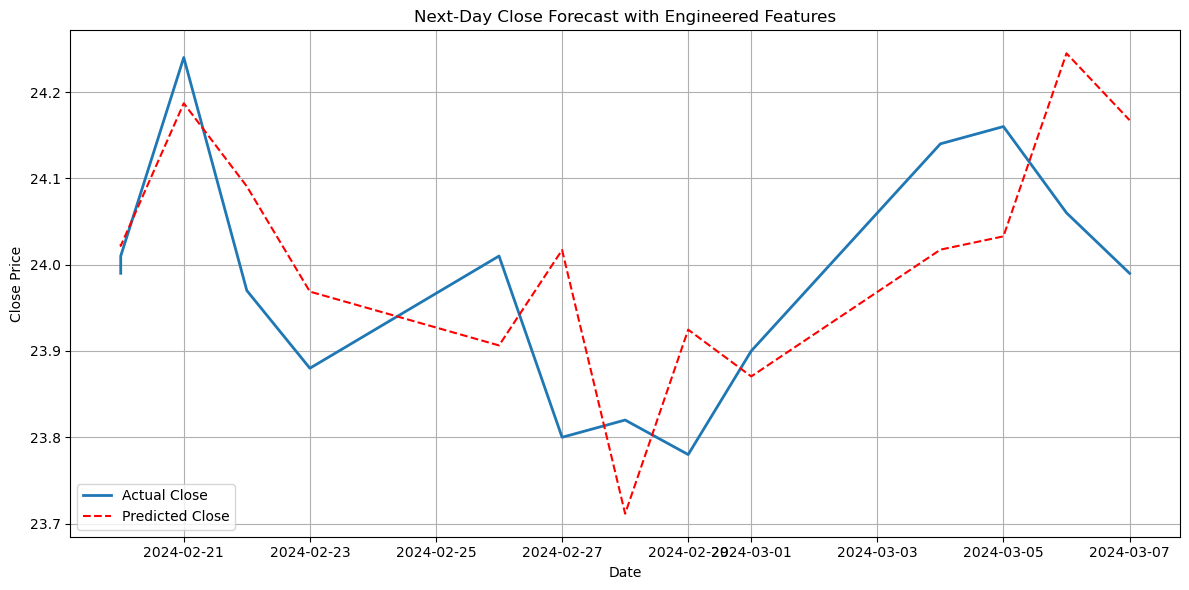

📊 XGBoost (with Engineered Features)
MAE:  0.1088
RMSE: 0.1239
R²:   0.1355


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure datetime indexes
tel_training.index = pd.to_datetime(tel_training.index)
tel_testing.index = pd.to_datetime(tel_testing.index)

# Combine
df = pd.concat([tel_training, tel_testing])
df = df[['Close']].copy()

# Feature engineering
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df['rolling_mean_3'] = df['Close'].rolling(3).mean()
df['rolling_std_3'] = df['Close'].rolling(3).std()
df['momentum_3'] = df['Close'] - df['Close'].shift(3)

# Lag features
for i in range(1, 6):
    df[f'lag_{i}'] = df['Close'].shift(i)

# Shifted target — predict next day's Close
df['target'] = df['Close'].shift(-1)

# Drop NA rows
df.dropna(inplace=True)

# Define features
features = ['log_return', 'rolling_mean_3', 'rolling_std_3', 'momentum_3'] + [f'lag_{i}' for i in range(1, 6)]
X = df[features]
y = df['target']

# Split
X_train = X.loc[tel_training.index.intersection(X.index)]
y_train = y.loc[tel_training.index.intersection(y.index)]

X_test = X.loc[tel_testing.index.intersection(X.index)]
y_test = y.loc[tel_testing.index.intersection(y.index)]

# Model
model = XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

# Results DataFrame
results = pd.DataFrame({
    'date': y_test.index,
    'actual_Close': y_test.values,
    'predicted_Close': preds
}).set_index('date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['actual_Close'], label='Actual Close', linewidth=2)
plt.plot(results.index, results['predicted_Close'], label='Predicted Close', linestyle='--', color='red')
plt.title('Next-Day Close Forecast with Engineered Features')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Metrics
mae = mean_absolute_error(results['actual_Close'], results['predicted_Close'])
rmse = np.sqrt(mean_squared_error(results['actual_Close'], results['predicted_Close']))
r2 = r2_score(results['actual_Close'], results['predicted_Close'])

print("📊 XGBoost (with Engineered Features)")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")



In [105]:
import pandas as pd
from xgboost import XGBRegressor
import numpy as np

# Ensure datetime index
tel_training.index = pd.to_datetime(tel_training.index)
tel_testing.index = pd.to_datetime(tel_testing.index)

# Combine training and testing data
df = pd.concat([tel_training, tel_testing])
df = df[['Close']].copy()
df = df[~df.index.duplicated(keep='first')]  # Just in case

# Create lag features
for i in range(1, 6):
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

# Train model on full dataset
X = df[[f'lag_{i}' for i in range(1, 6)]]
y = df['Close']
model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X, y)

# --- Predict known dates (rolling prediction) ---
predictions = []

for idx in range(5, len(df)):
    lagged = df.iloc[idx - 5:idx]['Close'].values[::-1]
    input_df = pd.DataFrame([lagged], columns=[f'lag_{i}' for i in range(1, 6)])
    pred = model.predict(input_df)[0]
    date = df.index[idx]
    predictions.append((date, pred))

rolling_pred_df = pd.DataFrame(predictions, columns=['date', 'predicted_Close']).set_index('date')
rolling_pred_df['actual_Close'] = df['Close'].loc[rolling_pred_df.index]

# --- Forecast future dates ---
future_steps = 20
last_known = df.iloc[-5:].copy()
future_preds = []
current_lags = last_known['Close'].values[::-1].tolist()

for i in range(future_steps):
    input_df = pd.DataFrame([current_lags], columns=[f'lag_{i}' for i in range(1, 6)])
    pred = model.predict(input_df)[0]
    next_date = df.index[-1] + pd.Timedelta(days=i + 1)
    future_preds.append((next_date, pred))
    current_lags = [pred] + current_lags[:-1]

future_df = pd.DataFrame(future_preds, columns=['date', 'predicted_Close']).set_index('date')
future_df['actual_Close'] = np.nan

# --- Final combined DataFrame ---
tel_full_results = pd.concat([rolling_pred_df, future_df])

# Preview
print("✅ Full prediction DataFrame for Telephone stock:")
display(tel_full_results.head())


✅ Full prediction DataFrame for Telephone stock:


,predicted_Close,actual_Close
date,,
2019-04-25,52.865772,53.26
2019-04-26,53.188286,53.45
2019-04-29,53.625370,54.12
2019-04-30,53.451469,54.01
2019-05-02,53.613815,54.40


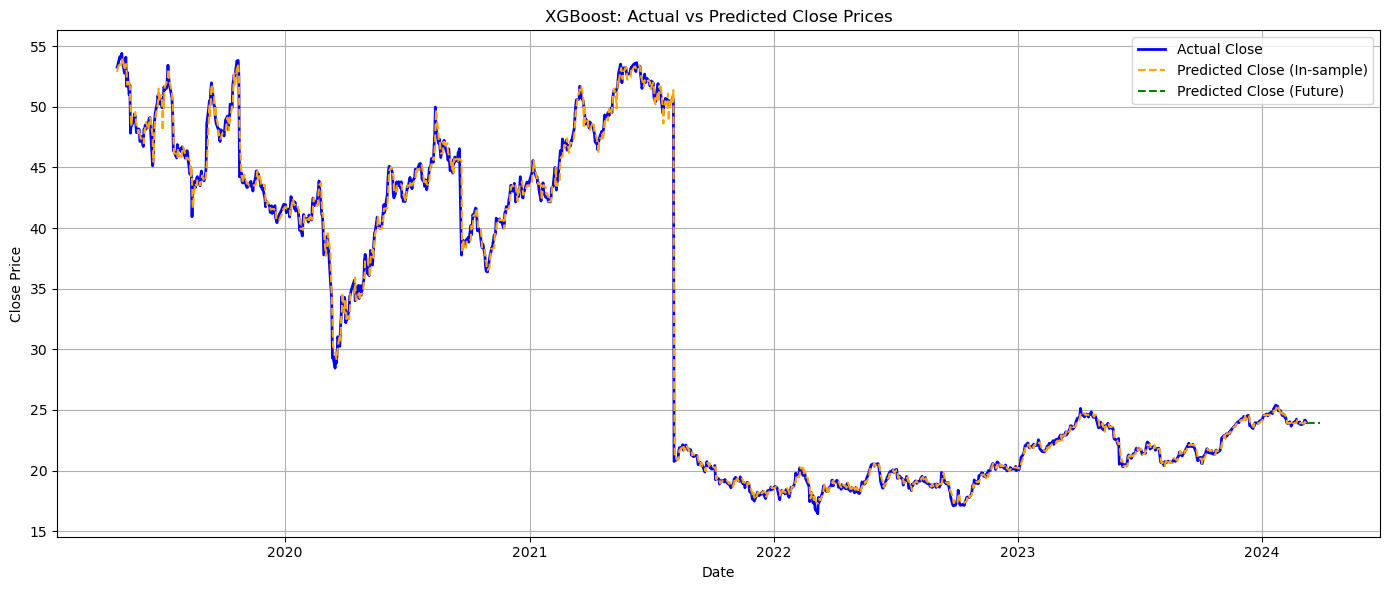

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot actual Close (historical only)
plt.plot(rolling_pred_df.index, rolling_pred_df['actual_Close'], label='Actual Close', color='blue', linewidth=2)

# Plot predicted Close (historical)
plt.plot(rolling_pred_df.index, rolling_pred_df['predicted_Close'], label='Predicted Close (In-sample)', color='orange', linestyle='--')

# Plot predicted Close (future)
plt.plot(future_df.index, future_df['predicted_Close'], label='Predicted Close (Future)', color='green', linestyle='--')

# Styling
plt.title('XGBoost: Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

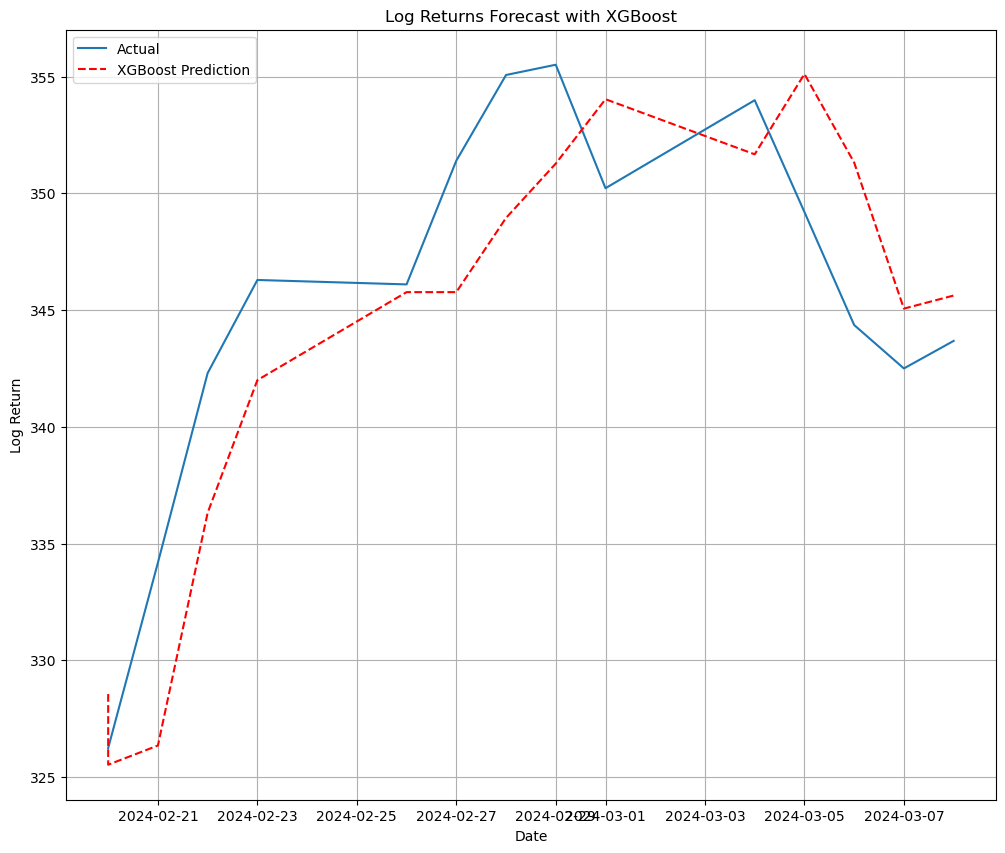

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Ensure datetime indexes
auto_training.index = pd.to_datetime(auto_training.index)
auto_testing.index = pd.to_datetime(auto_testing.index)

# Step 1: Combine both to create lag features across the boundary
combined = pd.concat([auto_training, auto_testing])

# Step 2: Create lag features (e.g., 5 lags)
for i in range(1, 6):
    combined[f'lag_{i}'] = combined['Close'].shift(i)

combined.dropna(inplace=True)

# Step 3: Split again using the original auto_training and auto_testing indexes
X = combined[[f'lag_{i}' for i in range(1, 6)]]
y = combined['Close']

# Match indices
X_train = X.loc[auto_training.index.intersection(X.index)]
y_train = y.loc[auto_training.index.intersection(y.index)]

X_test = X.loc[auto_testing.index.intersection(X.index)]
y_test = y.loc[auto_testing.index.intersection(y.index)]

# Step 4: Train the XGBoost model
model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 5: Predict
preds = model.predict(X_test)

# Step 6: Plot results
plt.figure(figsize=(12, 10))
plt.plot(y_test.index, y_test, label='Actual', linestyle='-')
plt.plot(y_test.index, preds, label='XGBoost Prediction', linestyle='--',color='red')
plt.title('Log Returns Forecast with XGBoost')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()


### metrics

In [91]:
# Step 7: Build result DataFrame
xgb_results = pd.DataFrame({
    'date': y_test.index,
    'actual_close': y_test.values,
    'predicted_close': preds
}).set_index('date')

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Extract actual and predicted
y_true = xgb_results['actual_close']
y_pred = xgb_results['predicted_close']

# Compute metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Display
print("📊 XGBoost Test-Only Model Performance")
print(f"MAE  (Mean Absolute Error):     {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R² Score:                       {r2:.4f}")


📊 XGBoost Test-Only Model Performance
MAE  (Mean Absolute Error):     0.1063
RMSE (Root Mean Squared Error): 0.1269
R² Score:                       0.0918


### Rolling XGBoost Forecast Code (walk-forward)



In [61]:
import pandas as pd
from xgboost import XGBRegressor
import numpy as np

# Prep
auto_training.index = pd.to_datetime(auto_training.index)
auto_testing.index = pd.to_datetime(auto_testing.index)
df = pd.concat([auto_training, auto_testing])
df = df[['Close']].copy()

# Remove duplicates (just in case)
df = df[~df.index.duplicated(keep='first')]

# Create lags
for i in range(1, 6):
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

# Train model
X = df[[f'lag_{i}' for i in range(1, 6)]]
y = df['Close']

model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X, y)

# --- Part 1: Predict known dates ---
predictions = []

for idx in range(5, len(df)):
    lagged = df.iloc[idx - 5:idx]['Close'].values[::-1]
    input_df = pd.DataFrame([lagged], columns=[f'lag_{i}' for i in range(1, 6)])
    pred = model.predict(input_df)[0]
    date = df.index[idx]
    predictions.append((date, pred))

rolling_pred_df = pd.DataFrame(predictions, columns=['date', 'predicted_Close']).set_index('date')
rolling_pred_df['actual_Close'] = df['Close'].loc[rolling_pred_df.index]

# --- Part 2: Predict N future days ---
future_steps = 20 # or 20, etc.
last_known = df.iloc[-5:].copy()

future_preds = []
current_lags = last_known['Close'].values[::-1].tolist()

for i in range(future_steps):
    input_df = pd.DataFrame([current_lags], columns=[f'lag_{i}' for i in range(1, 6)])
    pred = model.predict(input_df)[0]
    next_date = df.index[-1] + pd.Timedelta(days=i+1)
    
    future_preds.append((next_date, pred))
    
    # Update lags with latest prediction
    current_lags = [pred] + current_lags[:-1]

future_df = pd.DataFrame(future_preds, columns=['date', 'predicted_Close']).set_index('date')

# Combine known + future predictions
all_preds_df = pd.concat([rolling_pred_df, future_df])

# Preview
all_preds_df.head(), all_preds_df.tail()


(            predicted_Close  actual_Close
 date                                     
 2019-04-25       322.257324        315.95
 2019-04-26       318.257599        318.14
 2019-04-29       318.929718        319.20
 2019-04-30       319.279053        318.71
 2019-05-02       319.279053        323.11,
             predicted_Close  actual_Close
 date                                     
 2024-03-24       342.213593           NaN
 2024-03-25       342.213593           NaN
 2024-03-26       342.213593           NaN
 2024-03-27       342.213593           NaN
 2024-03-28       342.213593           NaN)

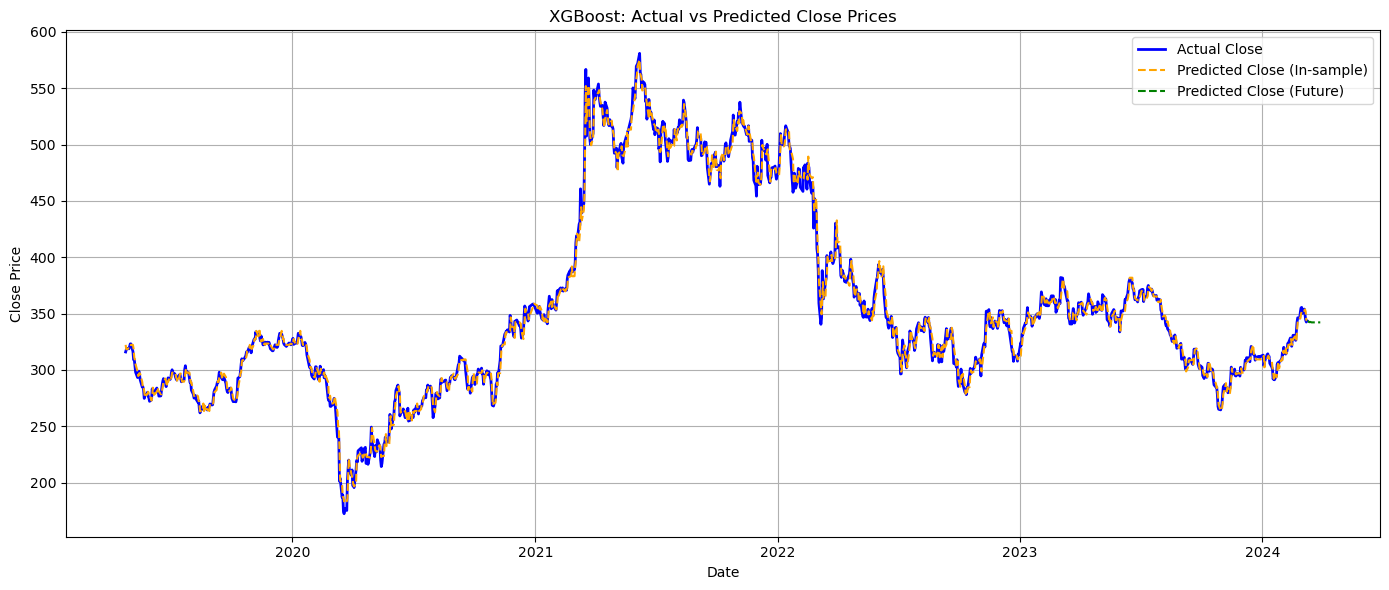

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot actual Close (historical only)
plt.plot(rolling_pred_df.index, rolling_pred_df['actual_Close'], label='Actual Close', color='blue', linewidth=2)

# Plot predicted Close (historical)
plt.plot(rolling_pred_df.index, rolling_pred_df['predicted_Close'], label='Predicted Close (In-sample)', color='orange', linestyle='--')

# Plot predicted Close (future)
plt.plot(future_df.index, future_df['predicted_Close'], label='Predicted Close (Future)', color='green', linestyle='--')

# Styling
plt.title('XGBoost: Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### metrics for model

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Extract actual and predicted from in-sample results
y_true = rolling_pred_df['actual_Close']
y_pred = rolling_pred_df['predicted_Close']

# Compute metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Display results
print(f"📊 XGBoost Model Performance:  MAE:{mae} \n rmse:{rmse} \n r2:{r2}")


📊 XGBoost Model Performance:  MAE:4.712800391745452 
 rmse:6.505397329549929 
 r2:0.9939997957420492


In [27]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime index
auto_training.index = pd.to_datetime(auto_training.index)
y_train = auto_training['log_returns']

# Define parameter ranges
p = d = q = range(0, 3)         # Non-seasonal
P = D = Q = range(0, 2)         # Seasonal
s = [7]                         # Weekly seasonality for daily data

# Create parameter grid
import itertools
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

# To store results
results = []
best_aic = np.inf
best_params = None

# Silence convergence warnings
warnings.filterwarnings("ignore")

# Grid search loop
for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(
                y_train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            res = model.fit(disp=False)
            results.append((order, seasonal_order, res.aic))

            if res.aic < best_aic:
                best_aic = res.aic
                best_params = (order, seasonal_order)

        except:
            continue

# Sort and print top 5
sorted_results = sorted(results, key=lambda x: x[2])
print("🔍 Top 5 parameter combinations (by AIC):")
for i in range(min(5, len(sorted_results))):
    print(f"{i+1}. Order: {sorted_results[i][0]}, Seasonal: {sorted_results[i][1]}, AIC: {sorted_results[i][2]:.2f}")

print("\n✅ Best model found:")
print(f"Order: {best_params[0]}")
print(f"Seasonal Order: {best_params[1]}")
print(f"AIC: {best_aic:.2f}")


🔍 Top 5 parameter combinations (by AIC):
1. Order: (0, 0, 2), Seasonal: (0, 1, 1, 7), AIC: 5497.30
2. Order: (0, 0, 1), Seasonal: (0, 1, 1, 7), AIC: 5498.35
3. Order: (0, 0, 2), Seasonal: (1, 1, 1, 7), AIC: 5499.30
4. Order: (1, 0, 2), Seasonal: (0, 1, 1, 7), AIC: 5499.89
5. Order: (1, 0, 1), Seasonal: (0, 1, 1, 7), AIC: 5499.91

✅ Best model found:
Order: (0, 0, 2)
Seasonal Order: (0, 1, 1, 7)
AIC: 5497.30


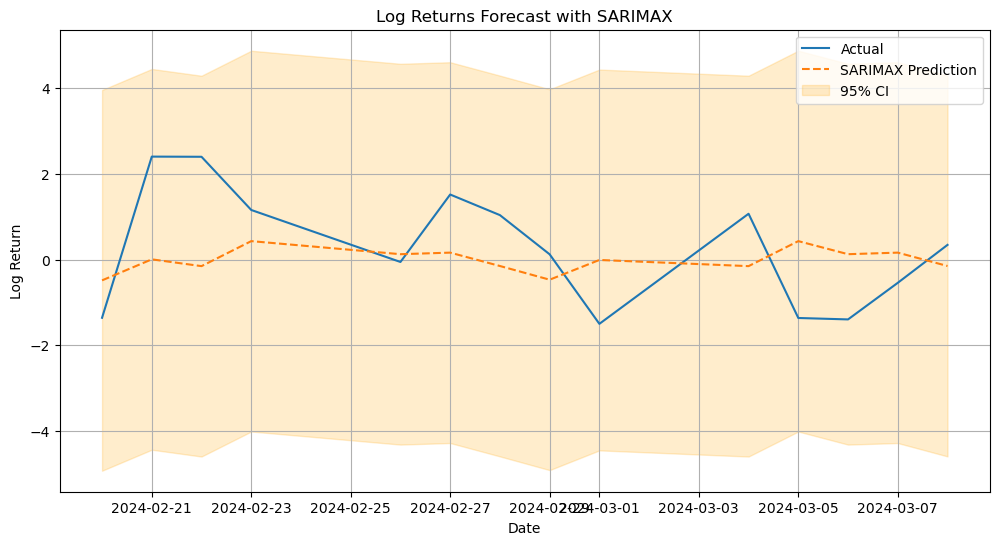

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime index
auto_training.index = pd.to_datetime(auto_training.index)
auto_testing.index = pd.to_datetime(auto_testing.index)

# Step 1: Define y_train and y_test
y_train = auto_training['log_returns']
y_test = auto_testing['log_returns']

# Step 2: Fit SARIMAX model
# You can tune (p, d, q) and (P, D, Q, s) as needed
model = SARIMAX(
    y_train,
    order=(0, 0, 2),             # ARIMA part: (p, d, q)
    seasonal_order=(0, 1, 1, 7), # Weekly seasonality for daily data
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)

# Step 3: Forecast the same number of steps as auto_testing
n_test = len(auto_testing)
forecast = results.get_forecast(steps=n_test)

# Step 4: Extract predicted values + confidence intervals
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Match forecast index to auto_testing
predicted_mean.index = auto_testing.index
conf_int.index = auto_testing.index

# Step 5: Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', linestyle='-')
plt.plot(predicted_mean.index, predicted_mean, label='SARIMAX Prediction', linestyle='--')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.2, label='95% CI')
plt.title('Log Returns Forecast with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()
